# CM6 : Données de type signal

In [1]:
!pip install torchaudio

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
!pip install utils

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
!pip install sox

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [4]:
!pip install soundfile

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [6]:
!pip install PySoundFile

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [16]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import torchaudio
import sox
import soundfile
import torch
from IPython.display import Audio, display
from scipy.fft import fft
from utils import *

# 1) Echantillonnage et dimensions

## cas des images

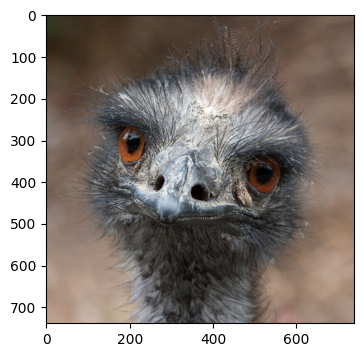

In [8]:
im = Image.open('emu_face.jpg')
plt.figure(figsize=(12,4))
plt.imshow(im)
plt.show()

In [14]:
imn = np.array(im)
print(f"dimensions de l'image (largeur, hauteur, couleur): {imn.shape}")

dimensions de l'image (largeur, hauteur, couleur): (739, 739, 3)


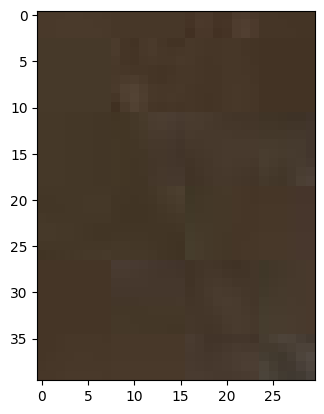

In [15]:
imnr = imn[85:125,240:270]
plt.imshow(imnr)
plt.show()

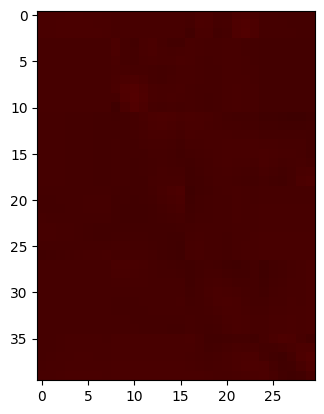

In [16]:
imnr_col = imnr.copy()
imnr_col[:,:,1:] =0
plt.imshow(imnr_col)
plt.show()

## cas des fichiers audio

In [9]:
y, fs = torchaudio.load('CantinaBand3.wav')

print(torchaudio.info('CantinaBand3.wav'))

AudioMetaData(sample_rate=22050, num_frames=66150, num_channels=1, bits_per_sample=16, encoding=PCM_S)


In [17]:
def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None, ylim=None):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    axes[c].plot(time_axis, waveform[c], linewidth=1)
    axes[c].grid(True)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
      axes[c].set_xlim(xlim)
    if ylim:
      axes[c].set_ylim(ylim)
  figure.suptitle(title)
  plt.show(block=False)

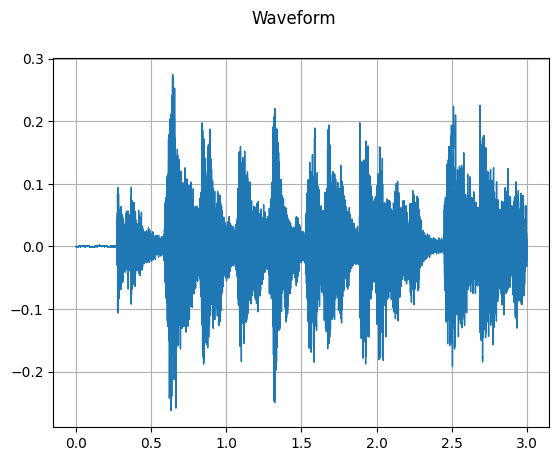

In [18]:
plot_waveform(y, fs)

In [12]:
display(Audio(y, rate=fs*2))

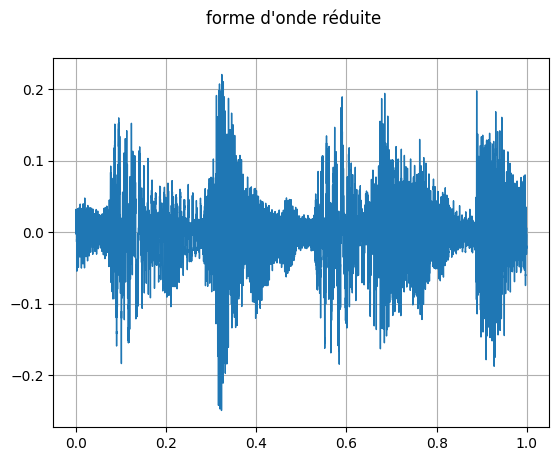

In [19]:
#je veux le signal entre 1 et 2s
#puis sur 10 échantillons
n1 = int(1*fs)
n2 = int(2*fs)
#n2 = n1+10
wr = y[0,n1:n2].reshape((1,n2-n1))
plot_waveform(wr, fs, "forme d'onde réduite")

## contenu fréquentiel (kesako ?)

In [23]:
def plot_specgram(waveform, sample_rate, title="Spectrogram", ylim=None):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    axes[c].specgram(waveform[c], Fs=sample_rate)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if ylim:
      axes[c].set_ylim(ylim)
  figure.suptitle(title)
  plt.show(block=False)

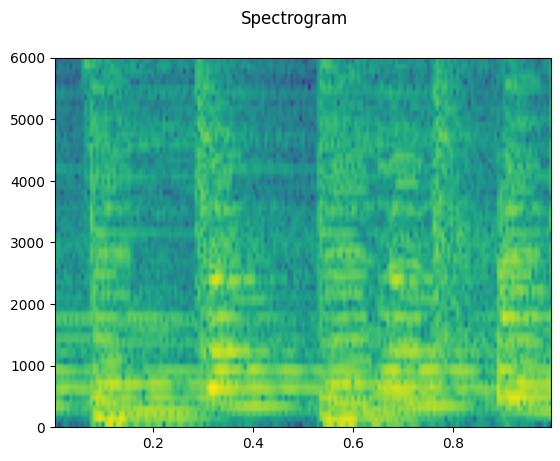

In [24]:
plot_specgram(wr, fs, ylim=[0, 6000])

![toto](./figures/everything_in_its_right_place.png)

Observer le contenu fréquentiel sur un extrait court et **stationnaire** ? 

In [25]:
nfft = 1024
nr1 = int(0.05*fs)
nr2 = int(0.25*fs)
wrr = wr[0,nr1:nr2].numpy()
print(wrr.shape)
tps = np.linspace(0.05, 0.25, nr2-nr1)
plot_temps(tps, wrr)
#TFwrr = fft(wrr, nfft)

#freq = np.linspace(0, fs, nfft)
#plot_freq(freq, np.abs(TFwrr), xlim=[0, 2500])

(4410,)


NameError: name 'plot_temps' is not defined

# 2) Définir des signaux théoriques

On essaye de reproduire deux signaux théoriques : sinus et rectangle sur une durée donnée avec une fréquence d'échantillonnage donnée.

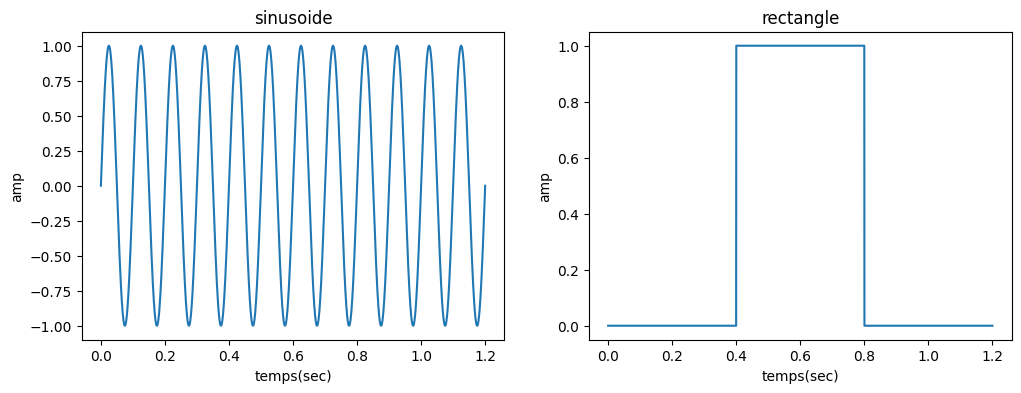

In [26]:
fsm = 2000  # Hz
Tm = 1.2   # secondes

def sinusoide(tps, f0):
    # tps: vecteurs de temps correspondant à l'échantillonnage
    # f0 : fréquence fondamentale, inverse de la période fondamentale
    return np.sin(2*np.pi*f0*tps)

def rectangle(tps, a, fs, m = None):
    # tps: vecteurs de temps correspondant à l'échantillonnage
    # a : largeur de la fenêtre (en secondes) où le rectangle vaut 1.
    # attention ici on placera par défaut le temps t=0 au milieu
    n = len(tps)
    if m:
        n1 = int(m*fs) - int(a*fs/2)
        n2 = int(m*fs) + int(a*fs/2)
    else:
        n1 = n//2 - int(a*fs/2)
        n2 = n//2 + int(a*fs/2)
    rec = np.zeros(n)
    rec[n1:n2] = 1
    return rec
    
t = np.linspace(0, Tm, int(Tm*fsm))
y = sinusoide(t, 10)
z = rectangle(t, 0.4, fsm)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(t,y)
plt.xlabel('temps(sec)')
plt.ylabel('amp')
plt.title('sinusoide')
plt.subplot(1,2,2)
plt.plot(t,z)
plt.xlabel('temps(sec)')
plt.ylabel('amp')
plt.title('rectangle')
plt.show()

Quelles fréquences sont contenues dans ces signaux ?? Faisons une transformée de Fourier, car la décomposition en série de Fourier n'est pas évidente à implémenter en python. 

Comme se sont des signaux **stationnaires** qui ne varient pas au cours du temps, on calculera la transformée de Fourier sur l'ensemble de la durée du signal. 

Pour des signaux non stationnaires comme ceux que vous traiterez en TD, on utilisera le concept de **trames** qui correspond à une fenêtre temporelle sur laquelle on considère le signal comme stationnaire. Typiquement dans le traitement audio ces trames durent entre 20 et 40ms.

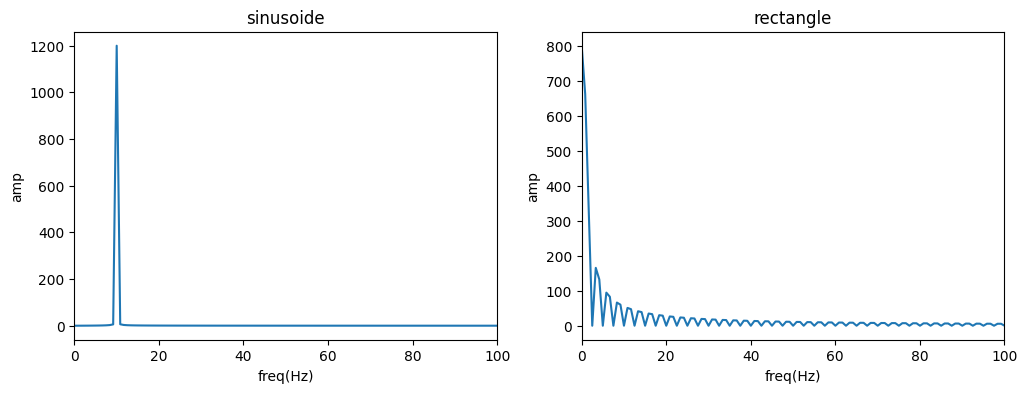

In [27]:
f = np.linspace(0, fsm, int(Tm*fsm))
TFy = np.abs(fft(y))
TFz = np.abs(fft(z))
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(f,TFy)
plt.xlabel('freq(Hz)')
plt.ylabel('amp')
plt.xlim([0,100])
plt.title('sinusoide')
plt.subplot(1,2,2)
plt.plot(f,TFz)
plt.xlabel('freq(Hz)')
plt.ylabel('amp')
plt.xlim([0,100])
plt.title('rectangle')
plt.show()

# 3) Reconstruire les premières notes

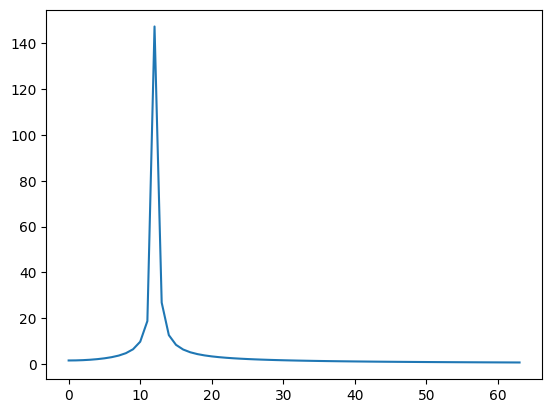

In [28]:
temps = np.linspace(0, wr.shape[1]/fs, wr.shape[1])
y1 = 0.3 * sinusoide(temps, 261.63) * rectangle(temps, 0.2, fs, m = 0.1)

#plot_temps(temps, y1)

y2 = (0.3 * sinusoide(temps, 261.63) +
      0.4 * sinusoide(temps, 207.65)) * rectangle(temps, 0.2, fs, m = 0.3)

#plot_temps(temps, y2)
freq = np.linspace(0, fs, wr.shape[1])
TFy1 = np.abs(fft(y1, nfft))
plt.plot(freq[:64],TFy1[:64])
#plt.plot(freq[:64], np.abs(TFwrr[0:64]), 'r')
plt.show()

In [29]:
display(Audio(y1+y2, rate=fs))

In [30]:
wav.write('debut.wav', fs, y1+y2)

### On voudrait un signal qui sonne plus "réel"
On va donc créer un signal harmonique, c'est à dire un signal qui contient une sinusoide de fréquence $f_0$ et ses harmoniques.

In [31]:
def harmonique(tps, f0, coef):
    y = np.zeros((len(coef), len(tps)))
    for i, c in enumerate(coef):
        y[i,:] = c * sinusoide(tps, i*f0)
    return np.sum(y, axis=0)

coef = [2/n if n > 0 else 1 for n in range(0,8) if n > 0]
print(coef)
yharmo = harmonique(temps, 10, coef)
r1 = rectangle(temps, 0.2, fs, m = 0.1)
plot_temps(temps,yharmo*r1)

[2.0, 1.0, 0.6666666666666666, 0.5, 0.4, 0.3333333333333333, 0.2857142857142857]


NameError: name 'plot_temps' is not defined

In [32]:
display(Audio(yharmo*r1+y2, rate=fs))